In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report


In [40]:
raw_df = pd.read_csv('census_income_original_2.csv')

/tmp/ipykernel_239356/2233103471.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('census_income_original_2.csv')


#### Data Exploration

In [41]:
raw_df.sample(3)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_value
1188,1189,30,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,1651,40,Vietnam,<=50K,9451
5608,5609,37,Private,Bachelors,13,Never-married,Sales,Not-in-family,Black,Female,0,0,40,United-States,<=50K,16377
9417,9418,42,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,16,United-States,<=50K,9050


In [42]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33333 entries, 0 to 33332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              33333 non-null  int64 
 1   age             33333 non-null  int64 
 2   workclass       33333 non-null  object
 3   education       33333 non-null  object
 4   education.num   33333 non-null  int64 
 5   marital.status  33333 non-null  object
 6   occupation      33333 non-null  object
 7   relationship    33333 non-null  object
 8   race            33333 non-null  object
 9   Gender          33333 non-null  object
 10  capital.gain    33333 non-null  int64 
 11  capital.loss    33333 non-null  int64 
 12  hours.per.week  33333 non-null  int64 
 13  native.country  33333 non-null  object
 14  income          33333 non-null  object
 15  income_value    13190 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.1+ MB


In [43]:
raw_df.duplicated().sum()

304

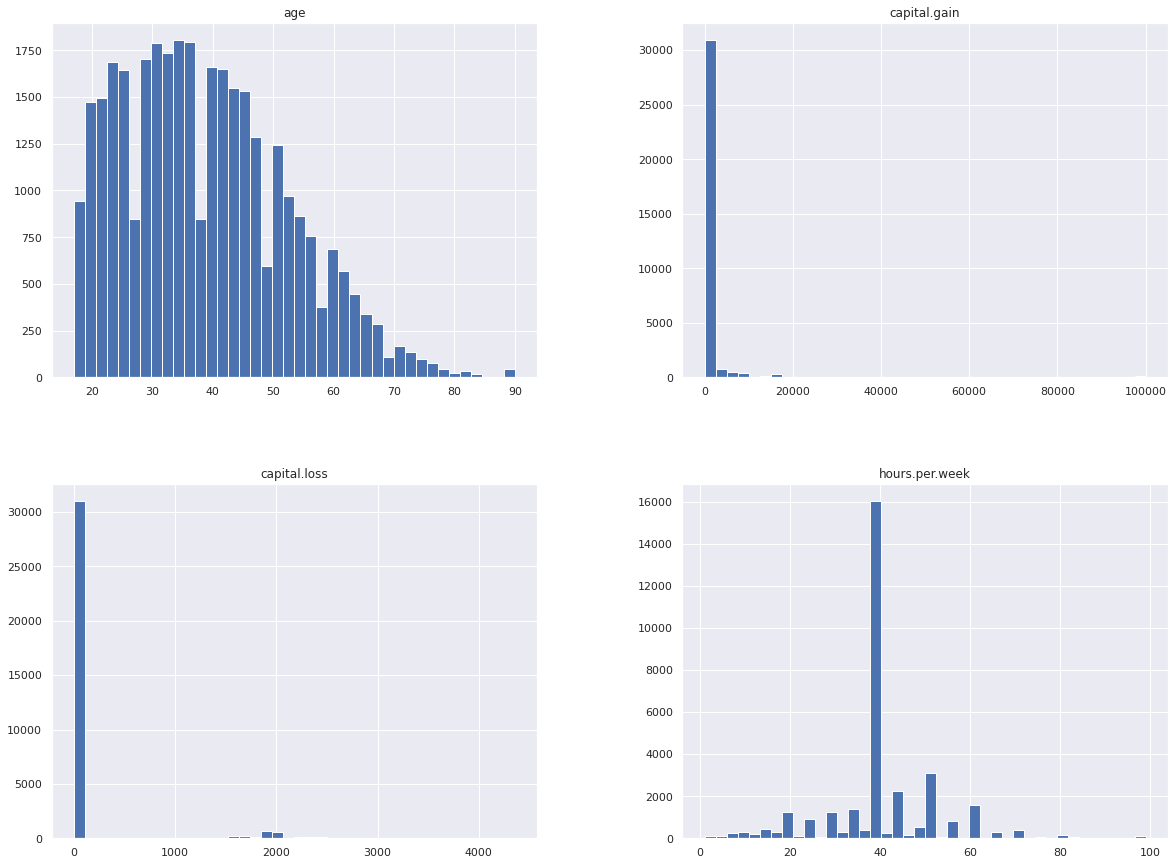

In [44]:
num_df = raw_df[['age', 'capital.gain', 'capital.loss', 'hours.per.week']].copy()
num_df.hist(layout=(2,2), figsize=(20,15),bins=40);

-capital loss and gain both need to treat outliers<br>
-most age recorded in the data is 40 

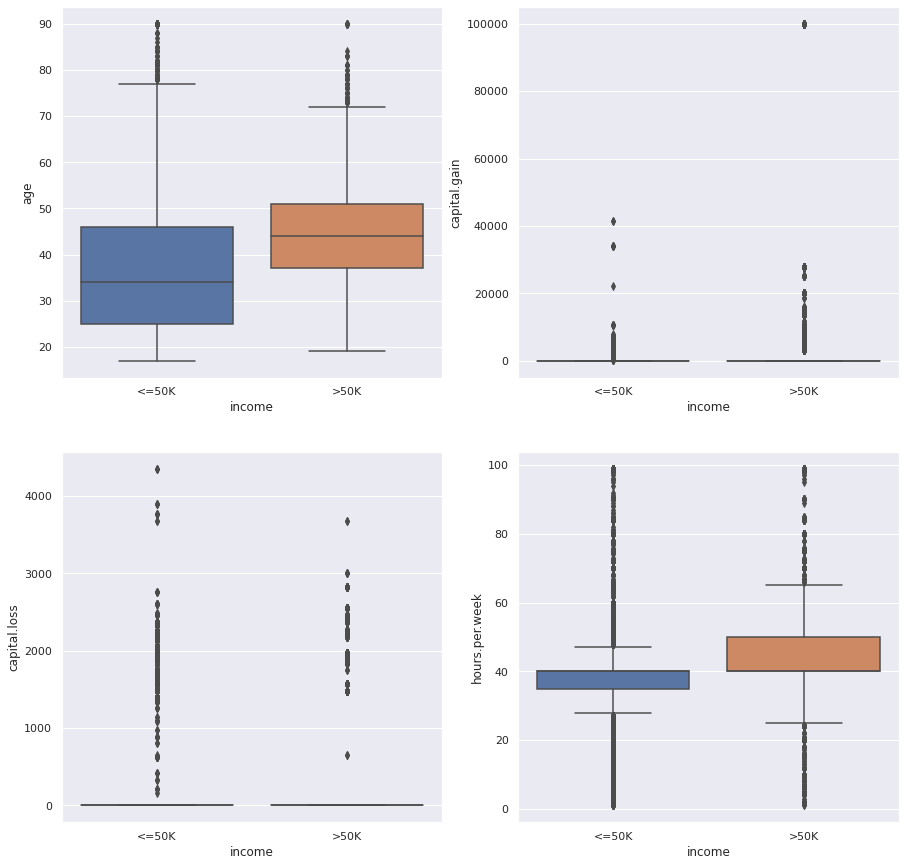

In [45]:
col = num_df.columns
fig, axes = plt.subplots(2 ,2 )
for i,t in enumerate(col):
    ax = sns.boxplot(y=t, x= "income", data=raw_df, orient='v', ax=axes.flatten()[i] )
    ax.set_xticklabels(ax.get_xticklabels())

Need to treat outliers (maybe use tree models)

In [46]:
categorical_cols = raw_df.select_dtypes(['object']).columns
#remove income-value column
categorical_cols = categorical_cols[:-1] 
categorical_cols

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'Gender', 'native.country', 'income'],
      dtype='object')

In [47]:
for c in categorical_cols:
    print('Column : ', c)
    print(raw_df[c].unique())
    print('_'*50, '\n')

Column :  workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
__________________________________________________ 

Column :  education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
__________________________________________________ 

Column :  marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
__________________________________________________ 

Column :  occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-,specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Prof-specialty'
 'Transport-moving' 'Handlers-cleaners' 'Sales' 'Farming-fishing'
 'Tech-support' 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
__________________________________________________ 

Column :  relationship
['Not-in-famil

- number of unknown values in each feature

In [48]:
for i in categorical_cols:
    print(i, raw_df[i].value_counts())


workclass Private             23170
Self-emp-not-inc     2636
Local-gov            2150
?                    1860
State-gov            1327
Self-emp-inc         1180
Federal-gov           989
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
education HS-grad         10673
Some-college     7409
Bachelors        5545
Masters          1827
Assoc-voc        1406
11th             1187
Assoc-acdm       1089
10th              946
7th-8th           655
Prof-school       628
9th               515
Doctorate         457
12th              434
5th-6th           341
1st-4th           170
Preschool          51
Name: education, dtype: int64
marital.status Married-civ-spouse       15568
Never-married            10776
Divorced                  4492
Separated                 1042
Widowed                   1011
Married-spouse-absent      421
Married-AF-spouse           23
Name: marital.status, dtype: int64
occupation Exec-managerial      4252
Craft-repair         4185
Adm-

- Number of '?' values in each feature is high so we can't drop them <br>
- Need to impute them with a new class or similar unknown class e.g. 'Other service'

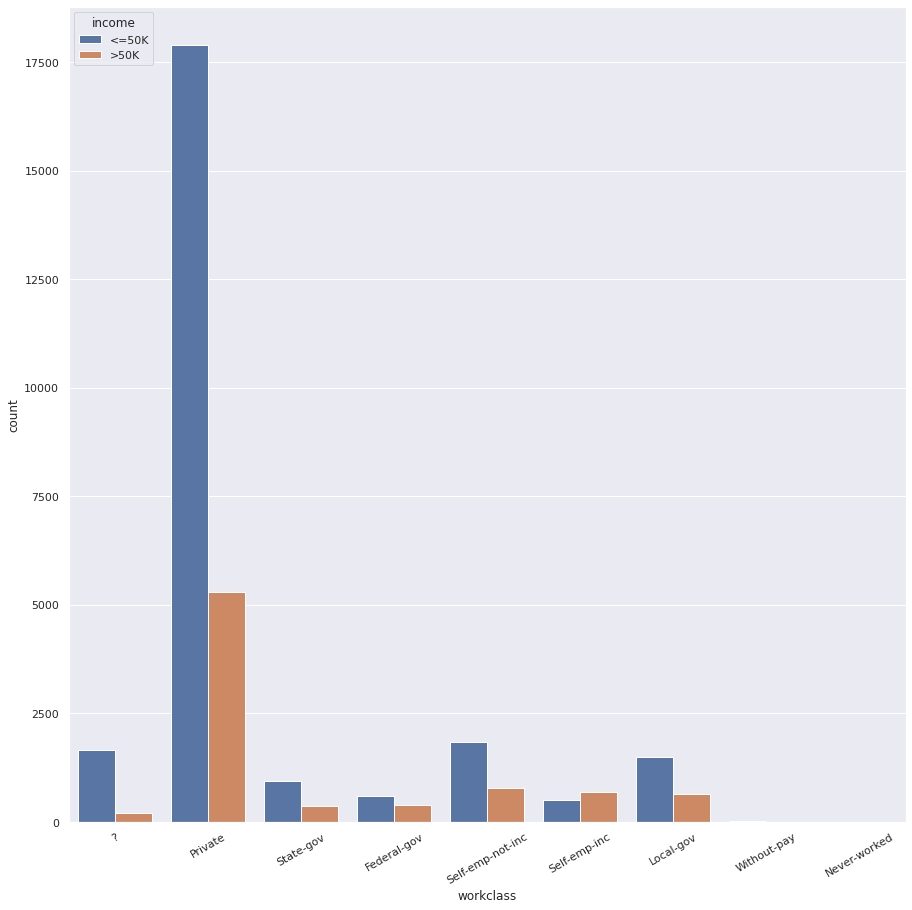

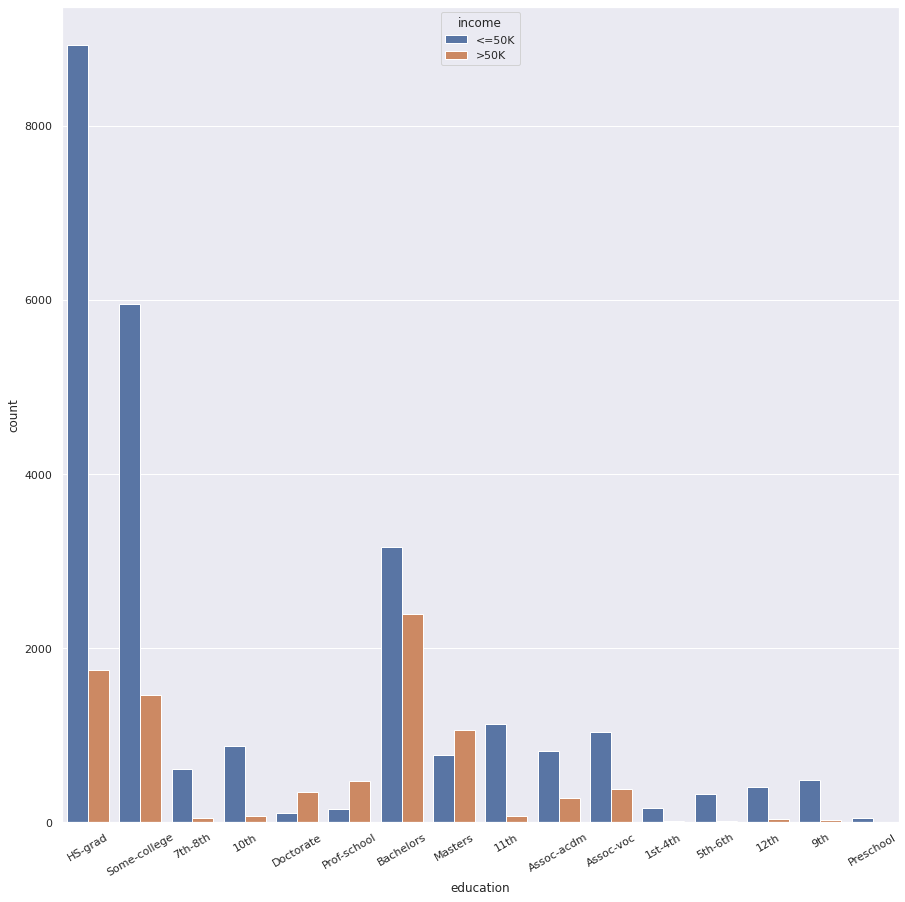

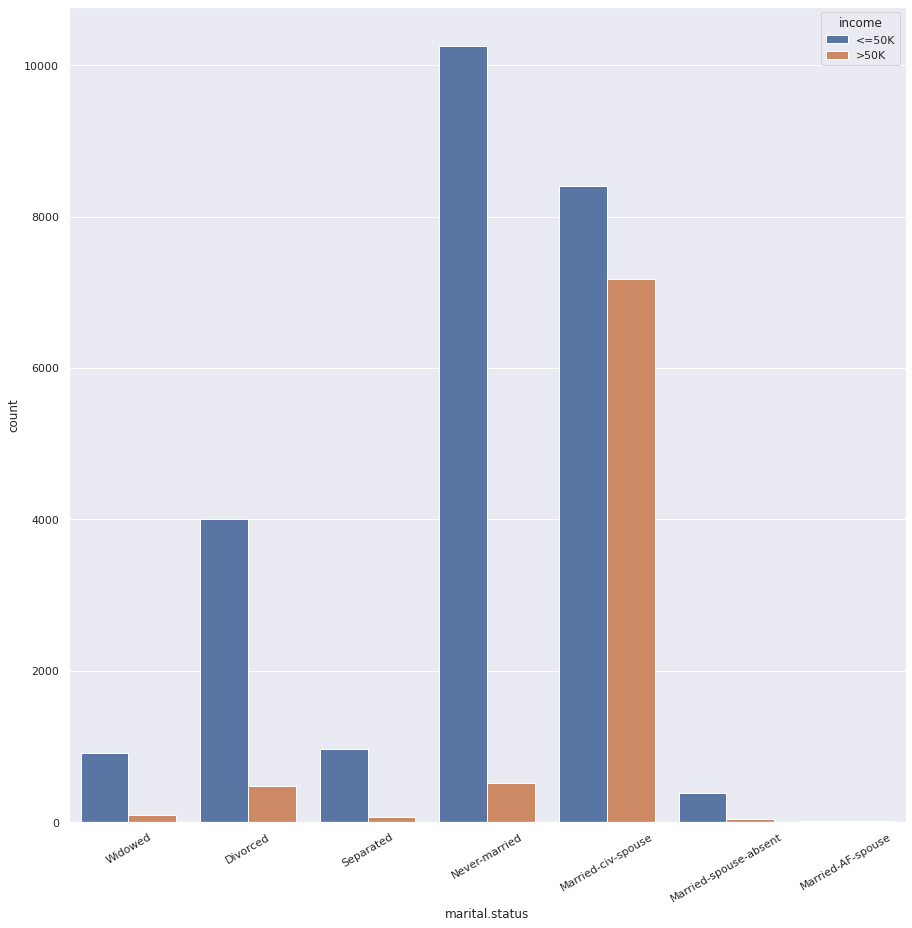

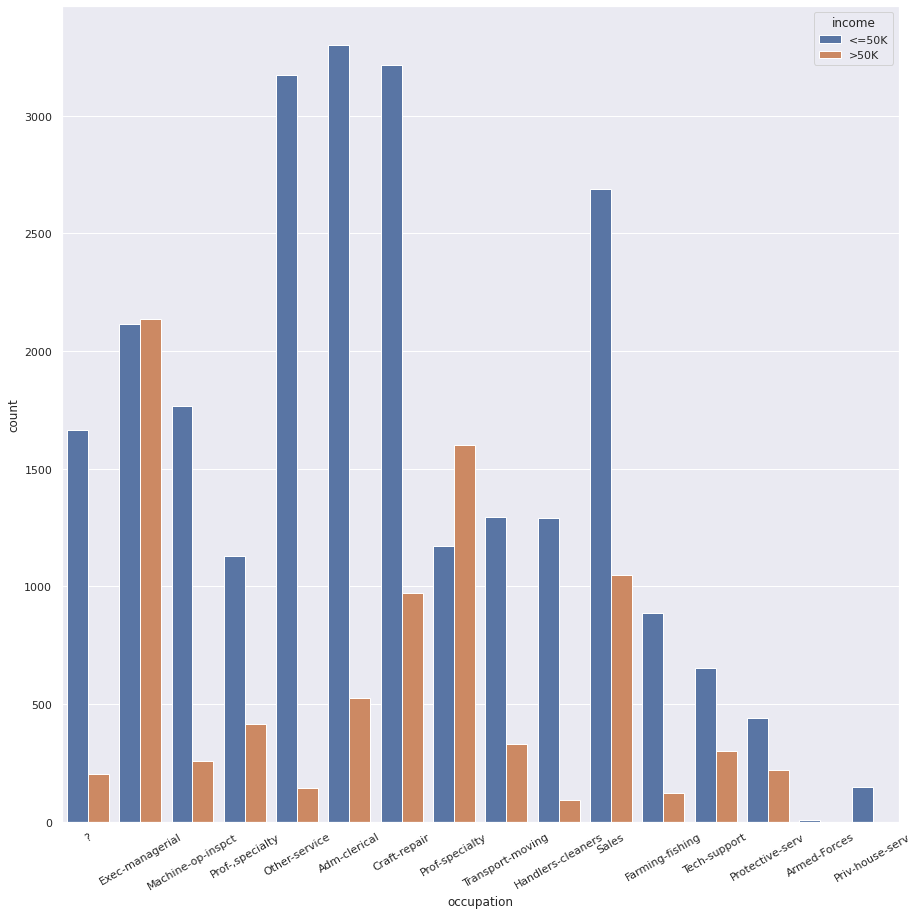

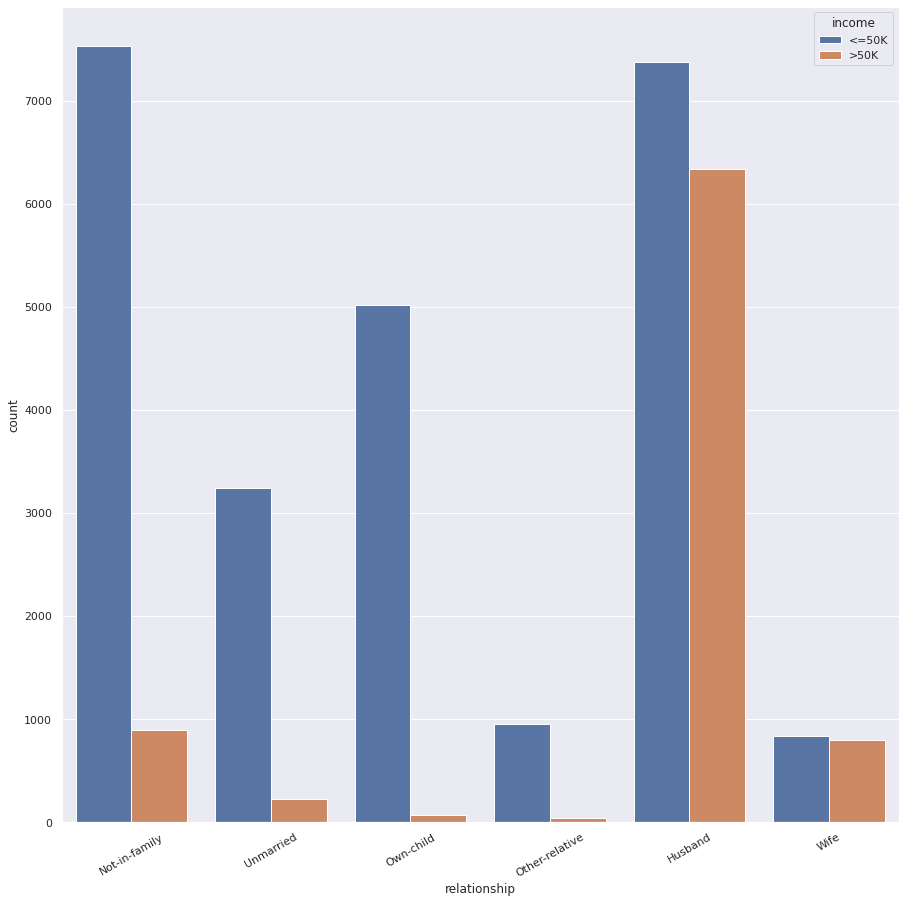

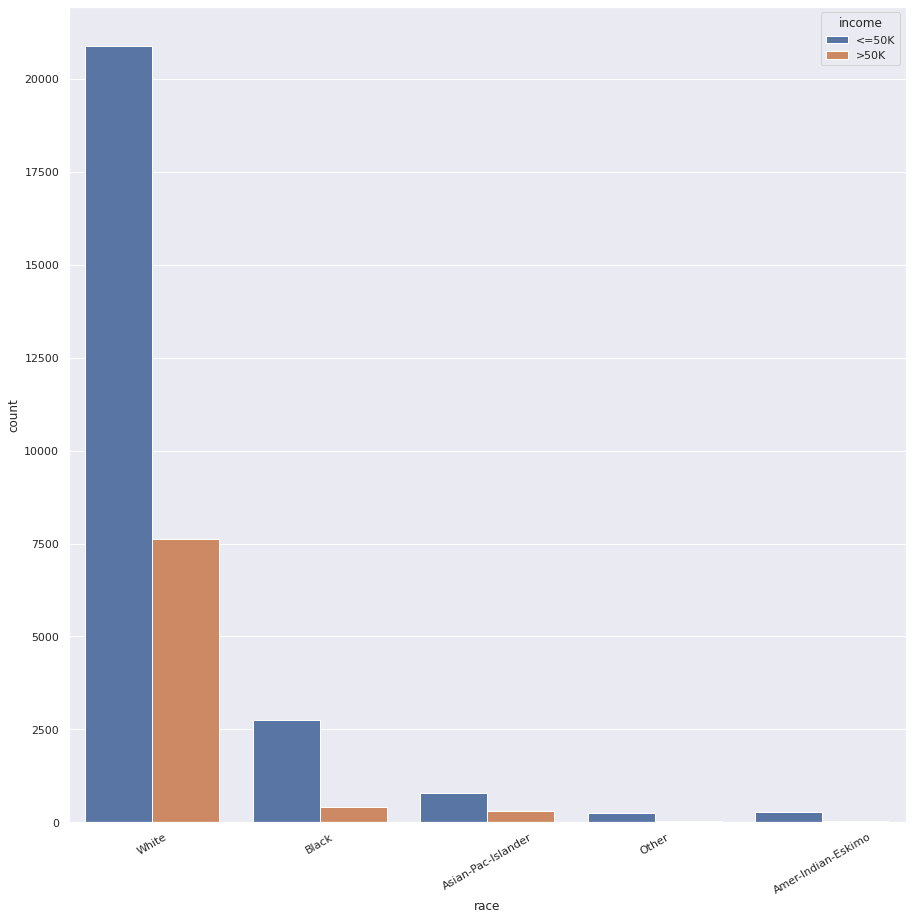

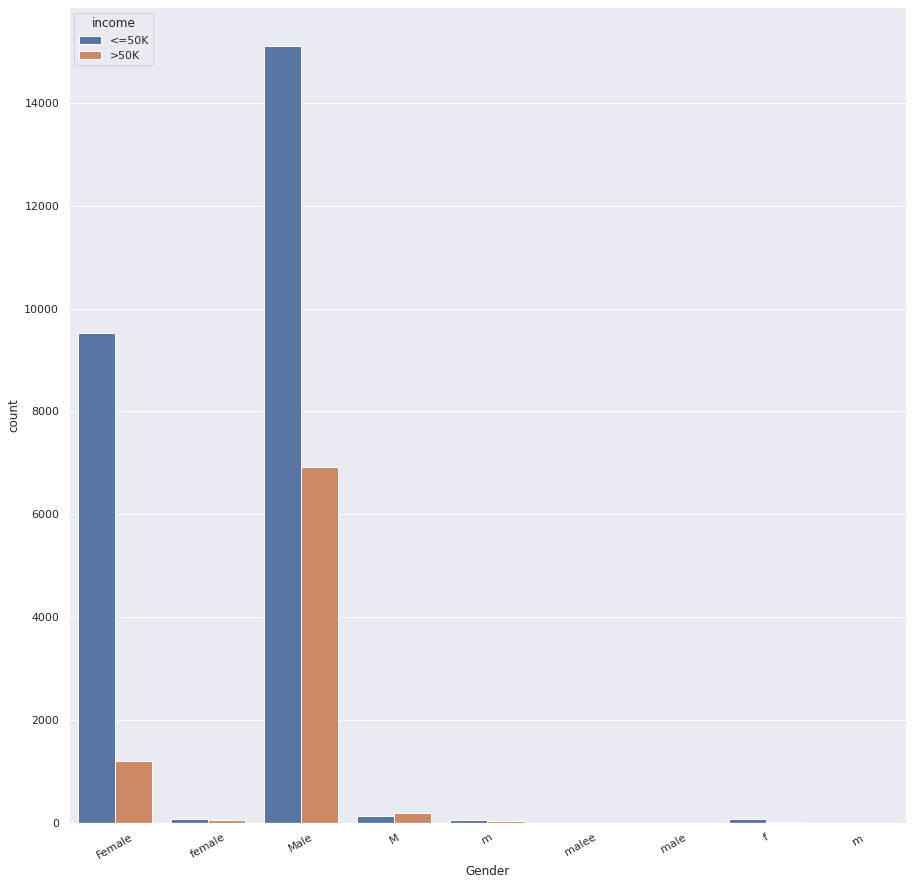

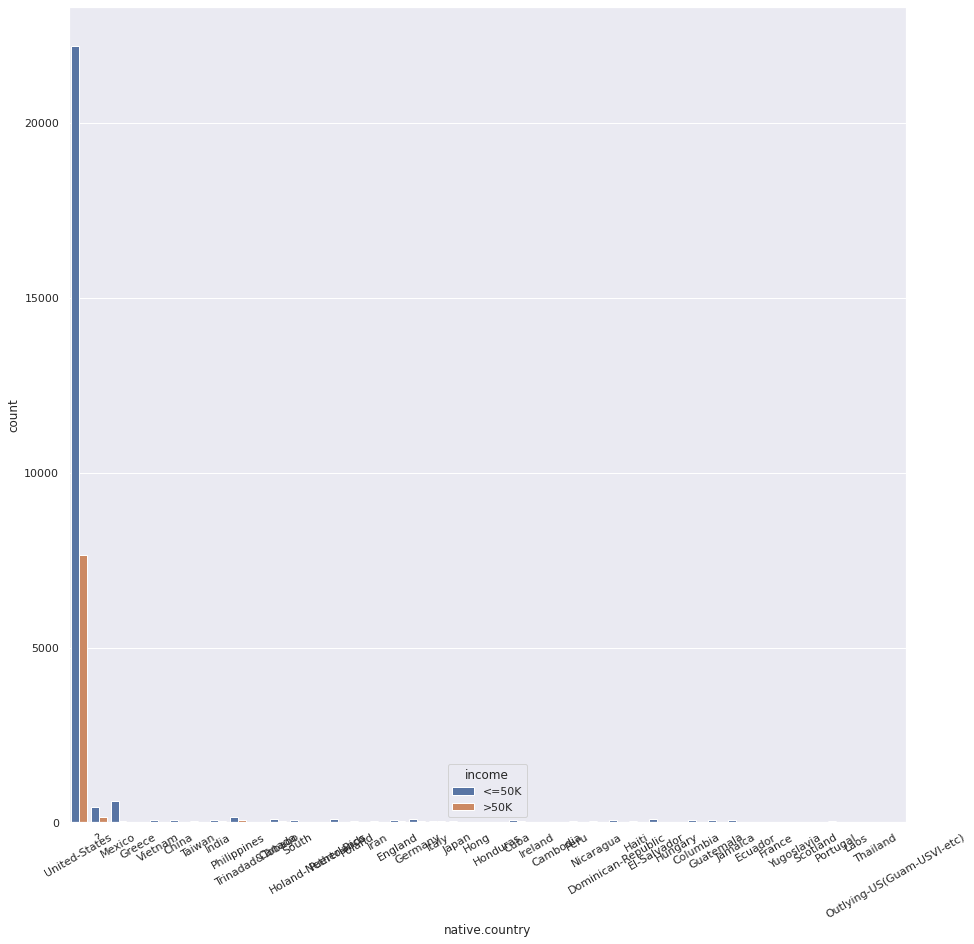

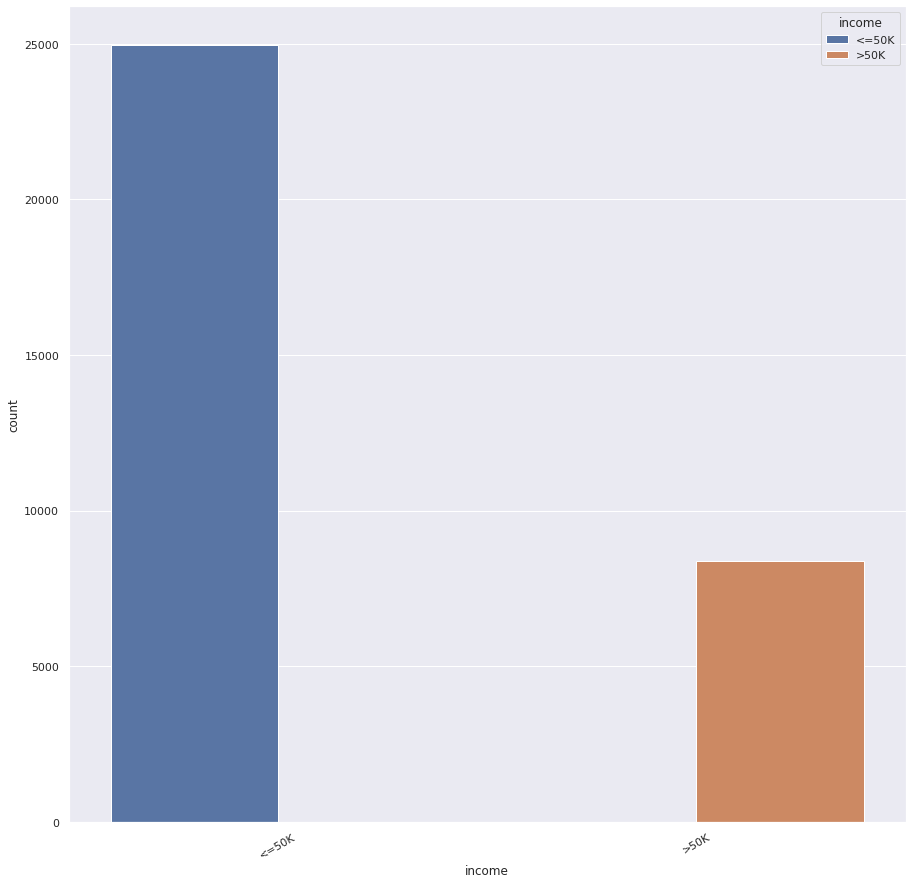

In [49]:
for c in categorical_cols:
    plt.xticks(rotation=30)
    sns.set(rc={'figure.figsize':(15,15)})
    sns.countplot(x=c, data=raw_df, hue='income')
    plt.show()

### Insights from data exploration
- The dataset is unbalanced -> target classes are not equal<br><br>
- Most participants in the data are from USA , Males, white race, HS grads and work in praivate sector <br><br>
- most current ages are in [30:40] years <br><br>
- The age is clost to normal distribution with high number of new borns.<br><br>
- Highest working hours are 40 <br><br>
- This shows that the data is biased and won't be a good judge of income for under presented class. <br><br>
- High-income entries belong to (bachelor education level, private work, married but don't own children, Executive managers and Prof-speciality occupation)<br><br>
- Most of the (doctorate, prof school and master degree holders have high income)<br><br>
- Lowest income entries belong to (Female, Eskimo-Inidan-Amer race,Protective-serv, Priv-house-serv, Armed-Forces occupations, people without pay or who never worked, people who own children, No education['pre school'] , and married-absent-spouse) classes<br><br>
- We need to mention that most of the lowest income classes have very few entries so this shows the need for more data which might give different insights.


---------------------------------------------------------

#### Data Preprocessing

- Drop duplicates
- Fix (gender column | occupation column (Prof-speciality) | workclass | education | native.country)
- remove nulls with suitable values -> No nulls
- drop income_value column
- check for outliers in age column > 130 years


In [50]:
preprocessed_df = raw_df.copy()

- drop duplicates

In [51]:
print(preprocessed_df.shape)
preprocessed_df.drop_duplicates(keep='first', inplace=True)
print(preprocessed_df.shape)


(33333, 16)
(33029, 16)


- gender

In [52]:
preprocessed_df['Gender'].unique()

array(['Female', 'female', 'Male', 'M', 'm', 'malee', 'male', 'f', 'm '],
      dtype=object)

In [53]:
preprocessed_df['Gender'] = preprocessed_df['Gender'].replace(['Male','M','malee', 'male', 'm '],'m')
preprocessed_df['Gender'] = preprocessed_df['Gender'].replace(['Female','female'],'f')

In [54]:
preprocessed_df['Gender'].unique()

array(['f', 'm'], dtype=object)

- occupation

In [58]:
preprocessed_df['occupation'].unique()

array(['Other-service', 'Exec-managerial', 'Machine-op-inspct',
       'Prof-specialty', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [59]:
preprocessed_df['occupation'] = preprocessed_df['occupation'].replace(['Prof-,specialty'],'Prof-specialty')
preprocessed_df['occupation'] = preprocessed_df['occupation'].replace(['?'],'Other-service')

In [60]:
preprocessed_df['occupation'].unique()

array(['Other-service', 'Exec-managerial', 'Machine-op-inspct',
       'Prof-specialty', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

- workclass

In [61]:
preprocessed_df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [62]:
preprocessed_df['workclass'] = preprocessed_df['workclass'].replace(['?'],'Other')
preprocessed_df['workclass'].unique()

array(['Other', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

- education

In [63]:
preprocessed_df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [64]:
preprocessed_df['education'] = preprocessed_df['education'].replace(['7th-8th', '10th', '11th','12th', '1st-4th', '5th-6th', '12th', '9th'],'No-HS-grad')
preprocessed_df['education'].unique()

array(['HS-grad', 'Some-college', 'No-HS-grad', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', 'Assoc-acdm', 'Assoc-voc',
       'Preschool'], dtype=object)

- country

In [66]:
preprocessed_df['native.country'] = preprocessed_df['native.country'].replace(['?'], 'Other')
preprocessed_df['native.country'].unique()

array(['United-States', 'Other', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

- age

In [74]:
(preprocessed_df['age'] > 130).sum()

0

- drop id and income_value

In [76]:
preprocessed_df.drop(['income_value', 'ID'], axis=1, inplace=True)

In [77]:
preprocessed_df.head(2)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Other,HS-grad,9,Widowed,Other-service,Not-in-family,White,f,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,f,0,4356,18,United-States,<=50K


In [173]:
final_df = preprocessed_df.copy()

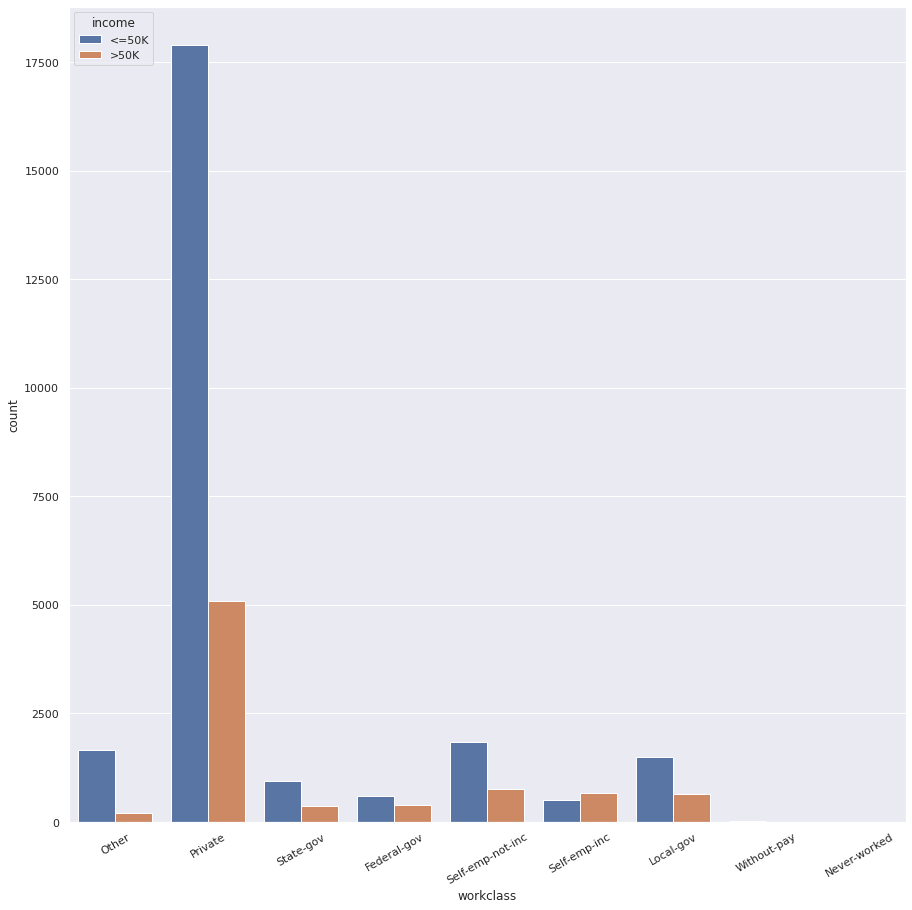

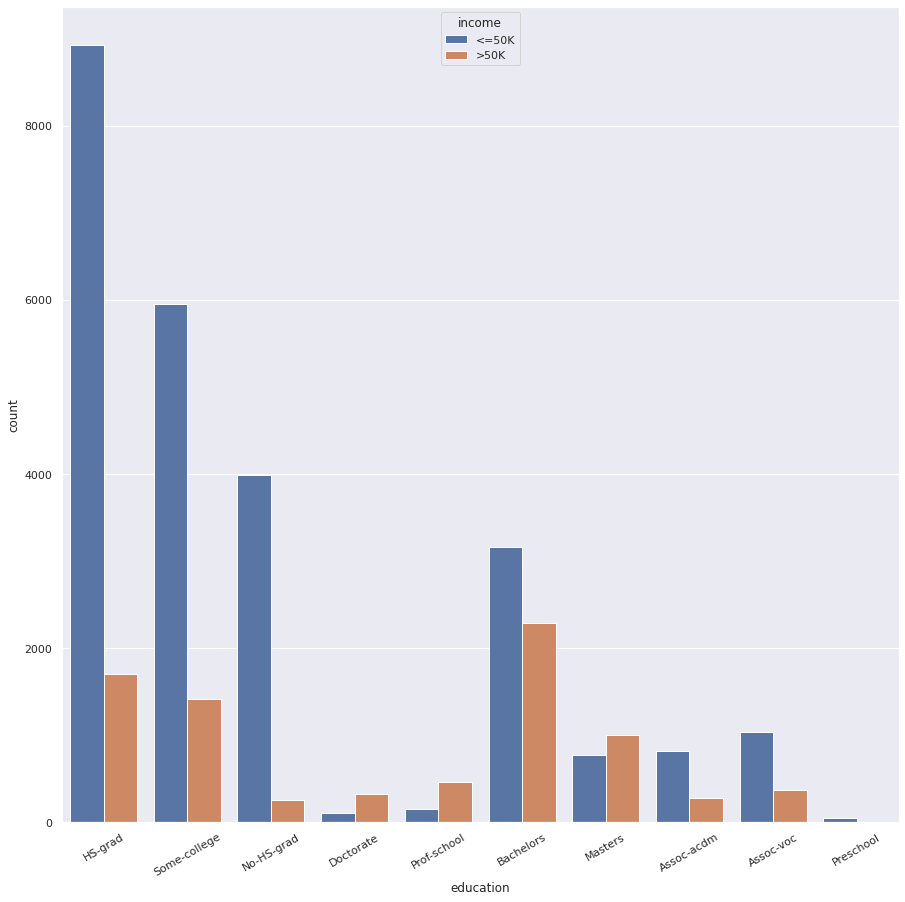

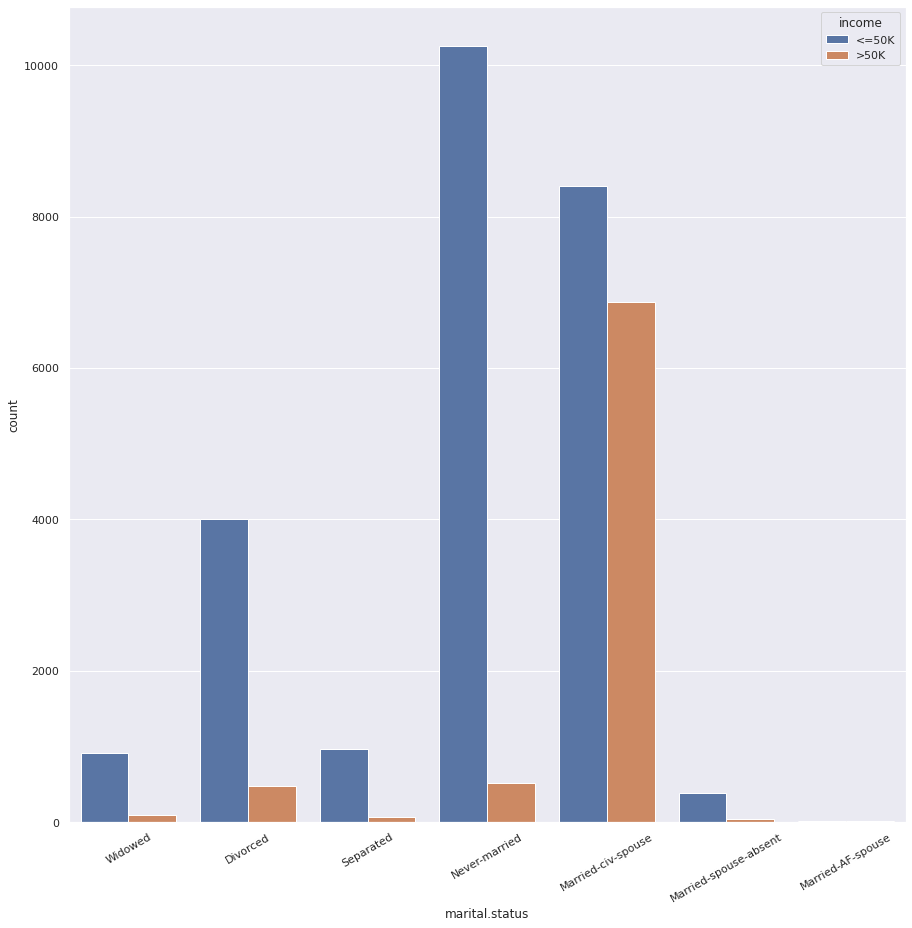

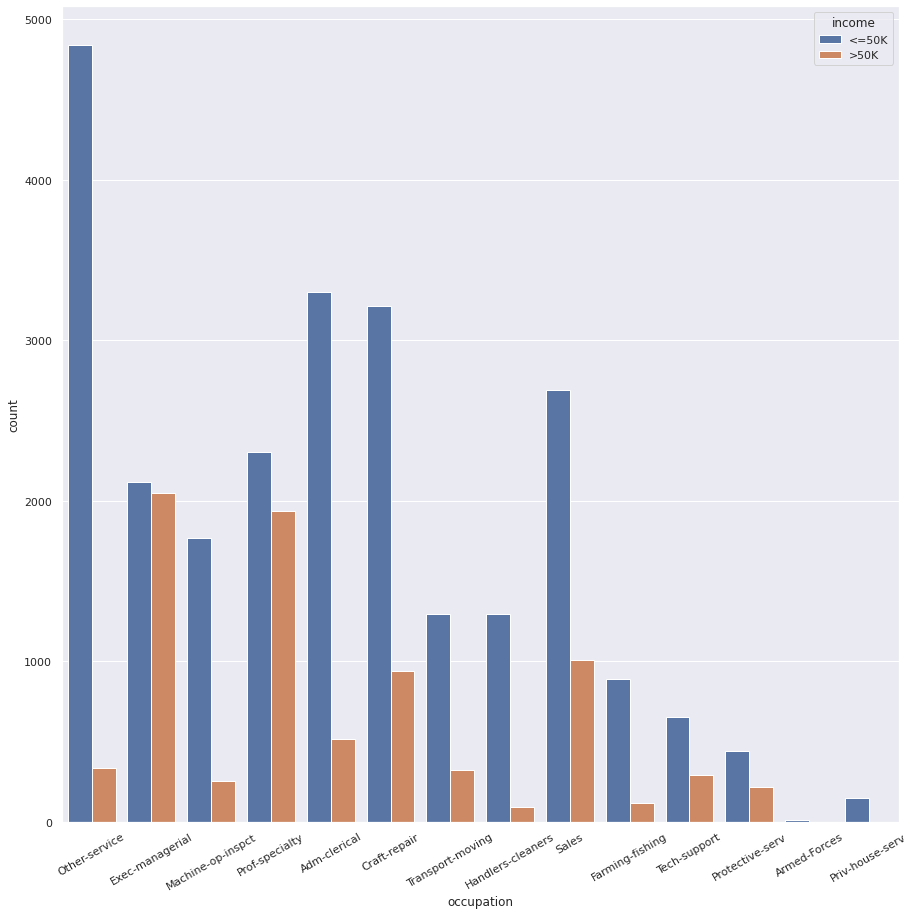

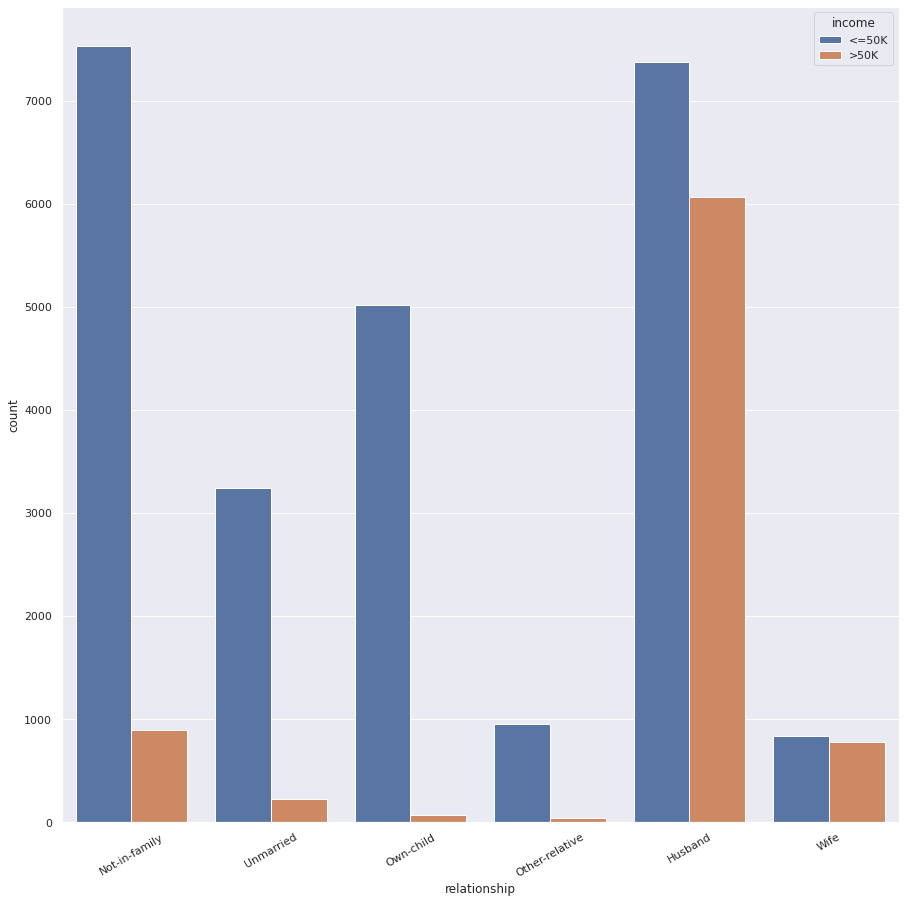

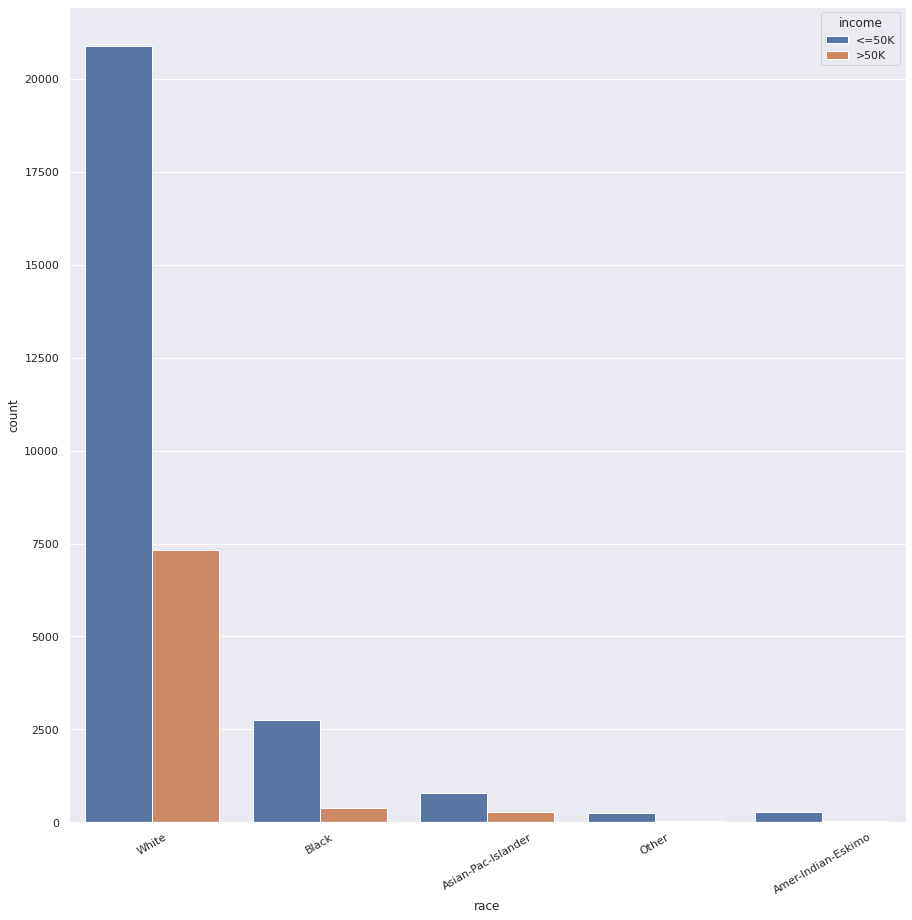

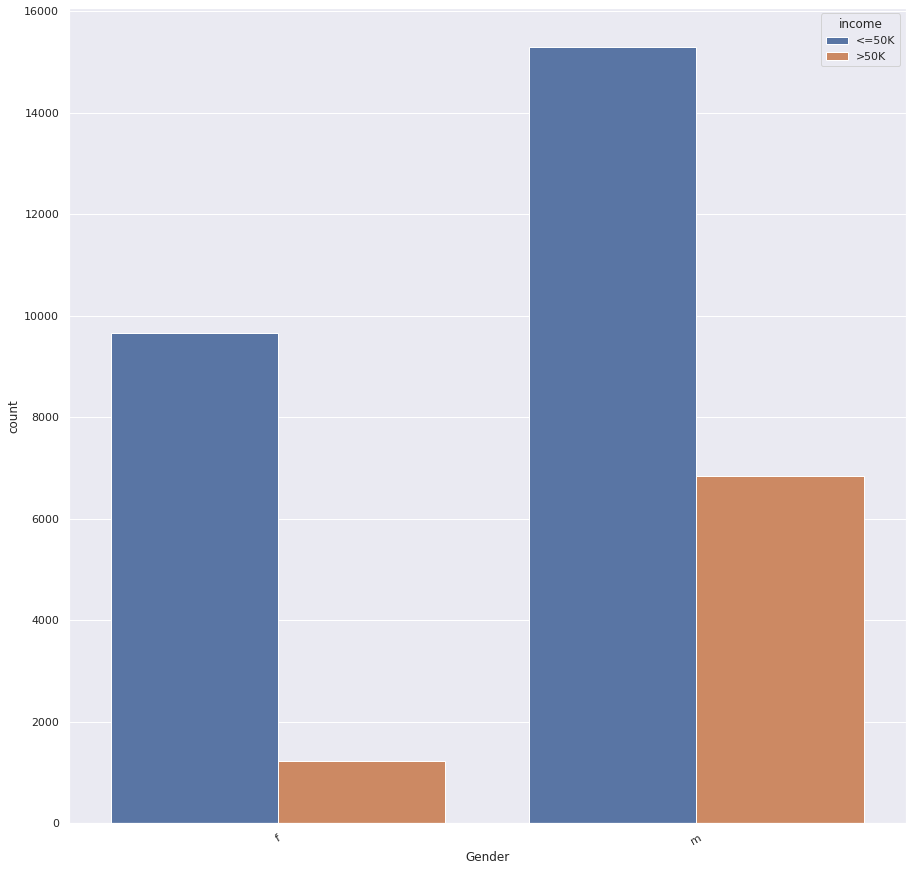

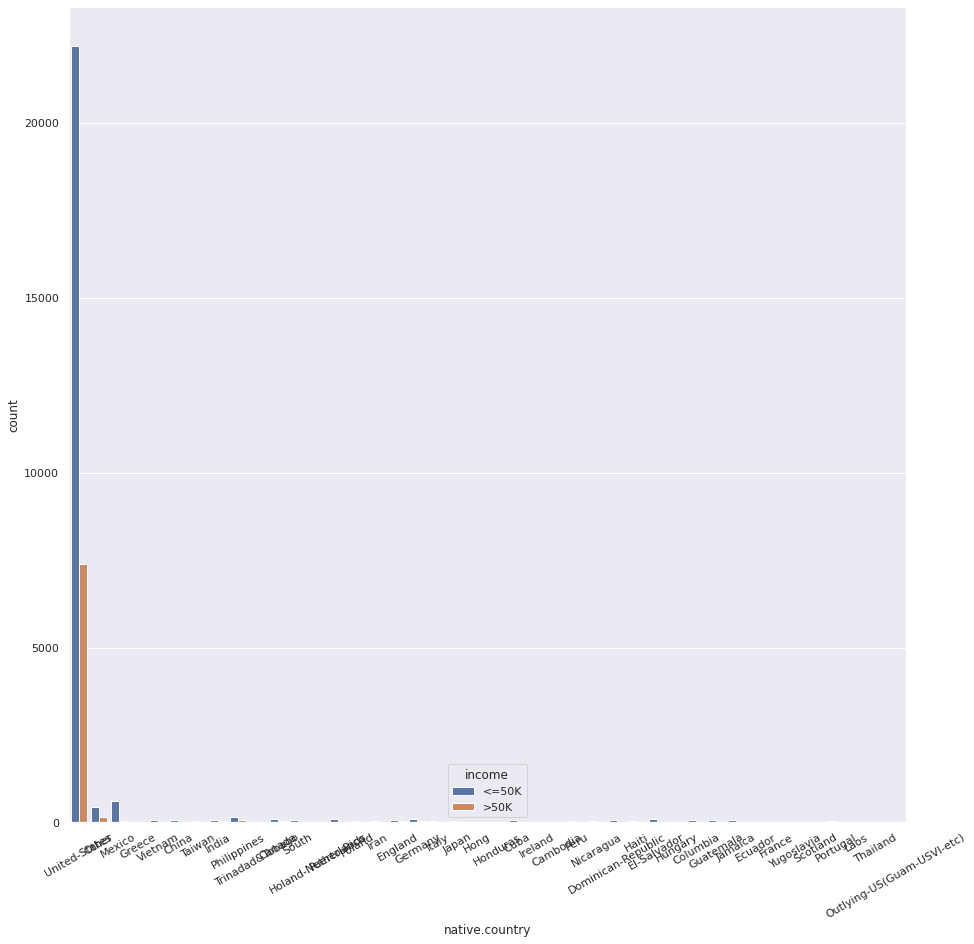

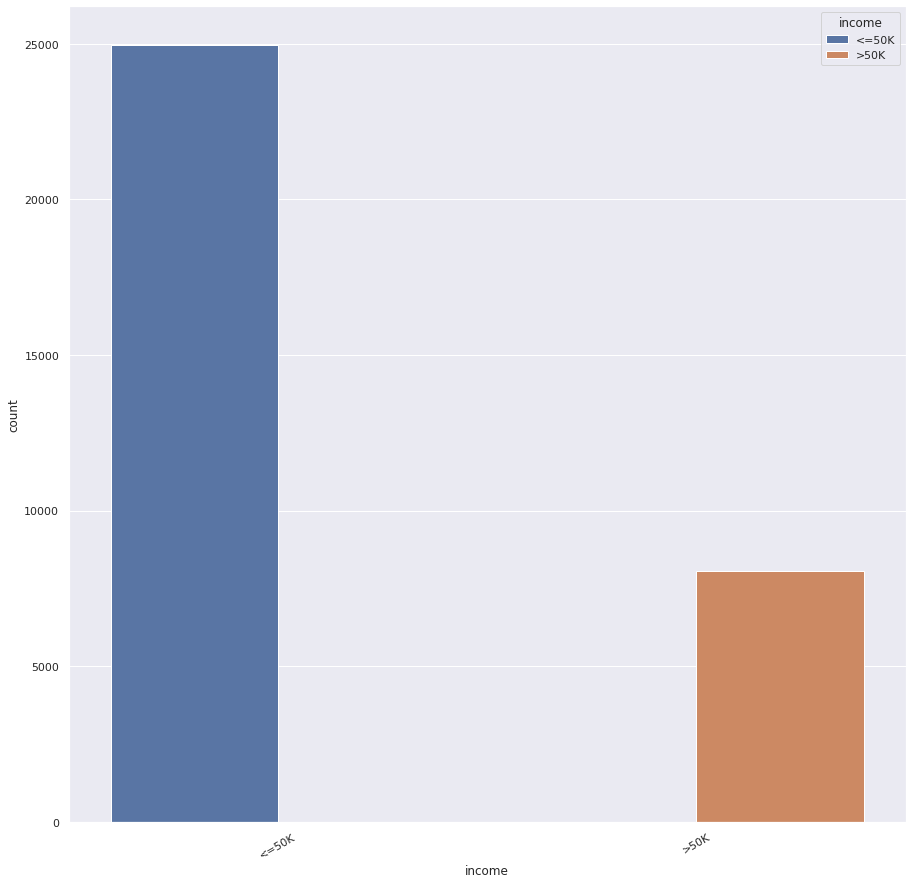

In [205]:
for c in categorical_cols:
    plt.xticks(rotation=30)
    sns.set(rc={'figure.figsize':(15,15)})
    sns.countplot(x=c, data=preprocessed_df, hue='income')
    plt.show()

--------------------------------------------------------------------------

##### Modeling

In [174]:
x_preprocessor_pipe = Pipeline(steps=[('encoding', OrdinalEncoder()), ('scaler', StandardScaler())])

In [175]:
x = final_df.iloc[:, :-1]
y = final_df.iloc[:, -1]
y = pd.DataFrame(LabelEncoder().fit_transform(y), columns=['income'])
y.value_counts()

income
0         24954
1          8075
dtype: int64

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [203]:
x_train = pd.DataFrame(x_preprocessor_pipe.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(x_preprocessor_pipe.fit_transform(x_test), columns=x_train.columns)


In [178]:
x_train

,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country
0,-1.002741,0.036883,-0.334840,-0.431461,-0.402619,1.780362,0.966770,-0.786130,0.70170,-0.276616,-0.234504,-0.039400,0.289231
1,1.931928,0.036883,0.409428,-1.593822,-1.730326,-0.263620,-0.274717,0.393167,-1.42511,-0.276616,-0.234504,-1.025962,0.289231
2,0.758060,0.775818,1.525831,-0.044008,-0.402619,-1.030113,-0.895460,0.393167,0.70170,-0.276616,-0.234504,0.371668,0.289231
3,-1.296208,1.514753,-0.334840,-0.431461,-0.402619,-1.030113,-0.895460,0.393167,0.70170,-0.276616,-0.234504,-0.039400,0.289231
4,0.244493,0.036883,-0.334840,-0.431461,-1.730326,0.247375,1.587513,0.393167,-1.42511,-0.276616,-0.234504,-0.861535,0.289231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23115,1.565094,0.036883,0.409428,-1.981276,-0.402619,-1.030113,-0.895460,0.393167,0.70170,-0.276616,-0.234504,-0.039400,0.289231
23116,-0.342440,0.036883,-1.823377,0.730900,-1.730326,-0.774616,-0.274717,0.393167,-1.42511,-0.276616,-0.234504,0.371668,0.289231
23117,0.464593,-2.918857,1.525831,-0.044008,-1.730326,-1.541109,1.587513,0.393167,0.70170,-0.276616,-0.234504,0.125027,0.289231
23118,1.198260,-2.918857,-0.334840,-0.431461,-0.402619,1.524864,-0.895460,0.393167,0.70170,-0.276616,3.462875,-0.039400,0.289231


In [183]:
for i in range(5):
    max_depth = [10, 30, 60, 90, 140]

    rf = RandomForestClassifier(max_depth= max_depth[i], bootstrap=True, random_state=42)
    rf.fit(x_train, y_train['income'])
    print('max depth = ', max_depth[i])
    print('Train accuracy = ', rf.score(x_train, y_train['income']))
    print('Test accuracy = ', rf.score(x_test, y_test['income']), '\n')



max depth =  10
Train accuracy =  0.8701557093425606
Test accuracy =  0.864971238268241 

max depth =  30
Train accuracy =  0.9796280276816609
Test accuracy =  0.85679685134726 

max depth =  60
Train accuracy =  0.9800173010380623
Test accuracy =  0.8551821576344737 

max depth =  90
Train accuracy =  0.9800173010380623
Test accuracy =  0.8551821576344737 

max depth =  140
Train accuracy =  0.9800173010380623
Test accuracy =  0.8551821576344737 



- model overfits with higher max depths

In [184]:
n_estimators = [100, 200, 300, 1000]
for i in range(4):
    rf = RandomForestClassifier(n_estimators= n_estimators[i], max_depth= 10, bootstrap=True, random_state=42)
    rf.fit(x_train, y_train['income'])
    print('n_estimators = ', n_estimators[i])
    print('Train accuracy = ', rf.score(x_train, y_train['income']))
    print('Test accuracy = ', rf.score(x_test, y_test['income']), '\n')

n_estimators =  100
Train accuracy =  0.8701557093425606
Test accuracy =  0.864971238268241 

n_estimators =  200
Train accuracy =  0.8701557093425606
Test accuracy =  0.8650721566252901 

n_estimators =  300
Train accuracy =  0.8704152249134948
Test accuracy =  0.8652739933393885 

n_estimators =  1000
Train accuracy =  0.8701124567474049
Test accuracy =  0.8643657281259461 



- n_estimators doesn't affect accuracy much

In [194]:
c = [0.01, 0.2, .4, .6]
for i in c:
    svc = SVC(gamma=i, kernel='rbf')
    svc.fit(x_train, y_train['income'])
    print('gamma = ', i)
    print('Train accuracy = ', svc.score(x_train, y_train['income']))
    print('Test accuracy = ', svc.score(x_test, y_test['income']), '\n')

gamma =  0.01
Train accuracy =  0.8391435986159169
Test accuracy =  0.8475123624987385 

gamma =  0.2
Train accuracy =  0.8679930795847751
Test accuracy =  0.85679685134726 

gamma =  0.4
Train accuracy =  0.886159169550173
Test accuracy =  0.8563931779190634 

gamma =  0.6
Train accuracy =  0.8958477508650519
Test accuracy =  0.8524573619941468 



- svc overfits with bigger gamma
- Random forest has higher accuracy and handles outliers better

## suggestion:
- For better classification we need to collect more data on underpresented classes.<br><br>
- Pay attention for 'Unknown' categories in user input since they don't help with decision making and have high precentage in the data.<br><br>
- High income classes are defined in the following:
(doctorate, prof school and master degree holders, private work, married but don't own children, Executive managers and Prof-speciality occupation)<br><br>
- Lowest income entries belong to (Female, Eskimo-Inidan-Amer race,Protective-serv, Priv-house-serv, Armed-Forces occupations, people without pay or who never worked, people who own children, No education['pre school'] , and married-absent-spouse) classes<br><br>
- For initial business decision, suggestions are:<br><br>
further investigation for lowest income classes since most of them are under presented in this data sample.




Thank you!